In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Supplemental Figure 1 - accuracy histogram by training data size

Loading summary data files ...


/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


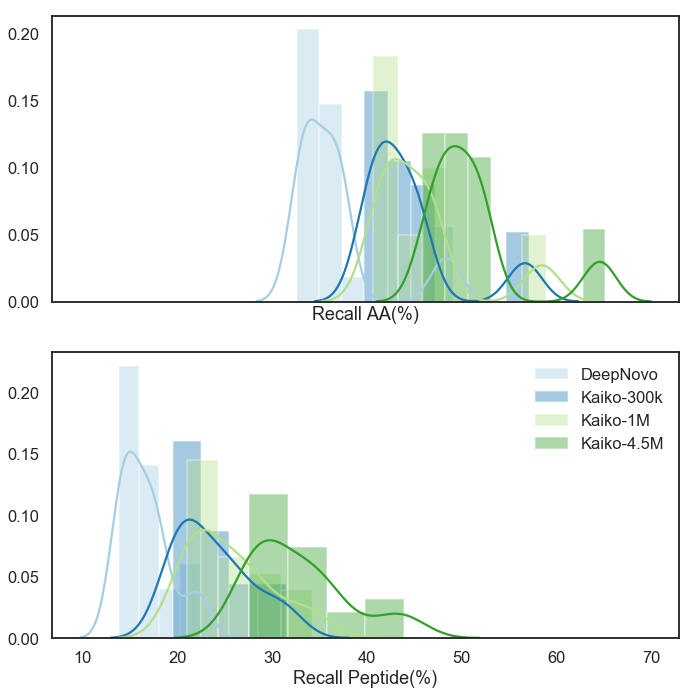

In [5]:
print('Loading summary data files ...')

mgf_tab = pd.read_csv('/Volumes/MSSHARE/Joonyong/mgf_list_v3.log', sep='\t')

sumary_0 = pd.read_csv('/Volumes/MSSHARE/Joonyong/DeepNovoRun/mgf_test/log.txt', sep='\t')
sumary_17 = pd.read_csv('/Volumes/MSSHARE/Joonyong/DeepNovoRun_0-17/mgf_test/log.txt', sep='\t')
sumary_57 = pd.read_csv('/Volumes/MSSHARE/Joonyong/DeepNovoRun_0-57/mgf_test/log.txt', sep='\t')
sumary_234 = pd.read_csv('/Volumes/MSSHARE/Joonyong/PnnlRun3_235_v4_0001_ep_60/mgf_test/log.txt', sep='\t')

test_data = []

test_data.append(mgf_tab.merge(sumary_0, left_on="mgf_file", right_on="file", how="inner"))
test_data.append(mgf_tab.merge(sumary_17, left_on="mgf_file", right_on="file", how="inner"))
test_data.append(mgf_tab.merge(sumary_57, left_on="mgf_file", right_on="file", how="inner"))
test_data.append(mgf_tab.merge(sumary_234, left_on="mgf_file", right_on="file", how="inner"))

data_labels = ['DeepNovo', "Kaiko-300k", "Kaiko-1M", "Kaiko-4.5M"]

sns.set(style="white", context="talk")

n_datasets = len(test_data)
colors = sns.color_palette("Paired", n_datasets*2)

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10,10))
for i, tdata in enumerate(test_data):
    sns.distplot(tdata[tdata.id>234].recall_AA*100, ax=ax[0], color=colors[i])
    sns.distplot(tdata[tdata.id>234].recall_peptide*100, ax=ax[1], label=data_labels[i], color=colors[i])

ax[0].set(xlabel="Recall AA(%)")
ax[1].set(xlabel="Recall Peptide(%)")
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig("supp_fig1.png", dpi=600)
plt.show()

# Supplemental Figure 2 - training trends

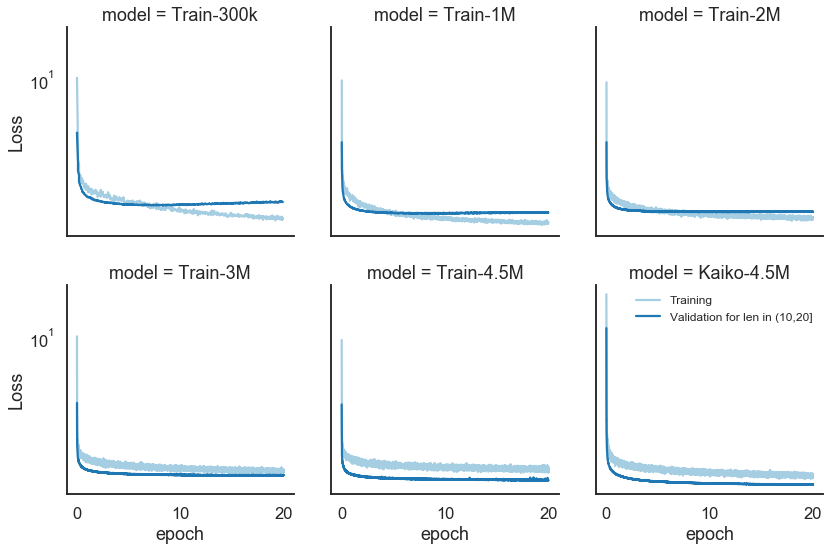

In [15]:
train_log_0 = pd.read_csv('/Volumes/MSSHARE/Joonyong/DeepNovoRun/log_file_caption_2dir.tab', sep='\t')
train_log_17 = pd.read_csv('/Volumes/MSSHARE/Joonyong/DeepNovoRun_0-17/deepnovo.train.model_0-17/log_file_caption_2dir.tab', sep='\t')
train_log_57 = pd.read_csv('/Volumes/MSSHARE/Joonyong/DeepNovoRun_0-57/deepnovo.train.model_0-57/log_file_caption_2dir.tab', sep='\t')
train_log_97 = pd.read_csv('/Volumes/MSSHARE/Joonyong/DeepNovoRun_0-97/deepnovo.train.model_0-97/log_file_caption_2dir.tab', sep='\t')
train_log_157 = pd.read_csv('/Volumes/MSSHARE/Joonyong/DeepNovoRun_0-158/deepnovo.train.model_0-158/log_file_caption_2dir.tab', sep='\t')
train_log_232 = pd.read_csv('/Volumes/MSSHARE/Joonyong/DeepNovoRun_235_v3_27/log_file_caption_2dir.tab', sep='\t')
train_log_232t = pd.read_csv('/Volumes/MSSHARE/Joonyong/PnnlRun3_235_v4_0001_ep_30/log_file_caption_2dir.tab', sep='\t')
train_logs = [train_log_17, train_log_57, train_log_97, train_log_157, train_log_232, train_log_232t]
train_models = ["Train-300k", "Train-1M", "Train-2M", "Train-3M", "Train-4.5M", "Kaiko-4.5M"]

for i, tl in enumerate(train_logs):
    tl['model'] = train_models[i]
train_logs_all = pd.concat(train_logs)
threshold = 20

df = pd.melt(train_logs_all, id_vars=['epoch', 'model'], value_vars=["perplexity_train", "perplexity_valid_1"], var_name='LossType', value_name='Loss')
g = sns.FacetGrid(df[df.epoch < threshold], col="model", hue="LossType", col_wrap=3, height=4, palette="Paired")
g = g.map(plt.semilogy, "epoch", "Loss")
plt.legend(["Training","Validation for len in (10,20]"],frameon=False, fontsize=12)
plt.tight_layout()
plt.savefig('supp_fig2.png', dpi=600)
plt.show()

# Supplemental Figure 3 - peptide length in training and testing dataset

In [4]:
kaiko = pd.read_pickle('/Volumes/MSSHARE/Joonyong/PnnlRun3_235_v4_0001_ep_30/mgf_test/all_results_df.pkl')
print(kaiko.shape)

(5116305, 19)


In [18]:
kaiko["type"] = "Train data"
kaiko.loc[kaiko.file_id>234, "type"] = "Test data"

In [19]:
kaiko.type.value_counts()

Train data    4604540
Test data      511765
Name: type, dtype: int64

In [55]:
count_len_AA = kaiko.groupby(by=["type","len_AA"]).len_AA.agg(['count'])
count_len_AA = count_len_AA.unstack(-1)
count_len_AA = 100*count_len_AA.div(count_len_AA.sum(axis=1), axis=0)
count_len_AA = count_len_AA.reset_index().melt(id_vars=count_len_AA.index.name)
count_len_AA.head()

,type,None,len_AA,value
0,Test data,count,6,0.369310
1,Train data,count,6,0.165293
2,Test data,count,7,2.159585
3,Train data,count,7,1.679343
4,Test data,count,8,4.065733


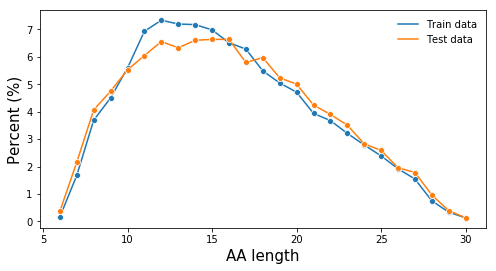

In [79]:
plt.close('all')

fig, ax = plt.subplots(sharex=True, figsize=(8,4))


g = sns.lineplot(x="len_AA", y="value", hue="type",
                 ax=ax, hue_order=["Train data", "Test data"],
                 data=count_len_AA[["type","len_AA","value"]], marker="o")
# g = sns.barplot(x="len_AA", y="value", hue="type",
#                  ax=ax,
#                  data=count_len_AA[["type","len_AA","value"]], alpha=0.5)


ax.set_xlabel("AA length", fontsize=15)
ax.set_ylabel("Percent (%)", fontsize=15)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:], frameon=False)
plt.savefig("suppl_fig3.dist_AA_len.png", dpi=600)
plt.show()

# Supplemental Figure 4 - Venn overlap of algorithms

In [88]:
peaks = pd.read_pickle('../../PEAKS_Results_KAIKO/all_results_from_peaks.pkl')
novor = pd.read_pickle('../../Novor_Results_KAIKO/all_results_from_novor.pkl')
kaiko = pd.read_pickle('../../PnnlRun3_235_v4_0001_ep_60/mgf_test/all_results_df.pkl')

In [89]:
kaiko_correct_scans = kaiko[kaiko.exact_match==1].scan.tolist()
peaks_correct_scans = peaks[peaks.exact_match==1].scan.tolist()
novor_correct_scans = novor[novor.exact_match==1].scan.tolist()

print('Correct Scans in Kaiko:', kaiko[kaiko.exact_match==1].shape[0])
print('Correct Scans in PEAKS:', peaks[peaks.exact_match==1].shape[0])
print('Correct Scans in Novor:', novor[novor.exact_match==1].shape[0])

print('Correct Scans in PEAKS and Kaiko:', peaks[(peaks.scan.isin(kaiko_correct_scans))&(peaks.exact_match==1)].shape[0])
print('Correct Scans in Novor and Kaiko:', novor[(novor.scan.isin(kaiko_correct_scans))&(novor.exact_match==1)].shape[0])
print('Correct Scans in PEAKS and Novor:', peaks[(peaks.scan.isin(novor_correct_scans))&(peaks.exact_match==1)].shape[0])

print('Correct Scans in one of three:', np.unique(kaiko_correct_scans+peaks_correct_scans+novor_correct_scans).shape)
print('Correct Scans in all three:', kaiko[(kaiko.scan.isin(peaks_correct_scans))&(kaiko.scan.isin(novor_correct_scans))&(kaiko.exact_match==1)].shape[0])

Correct Scans in Kaiko: 166761
Correct Scans in PEAKS: 136477
Correct Scans in Novor: 100784
Correct Scans in PEAKS and Kaiko: 94403
Correct Scans in Novor and Kaiko: 84866
Correct Scans in PEAKS and Novor: 69733
Correct Scans in one of three: (217463,)
Correct Scans in all three: 62443


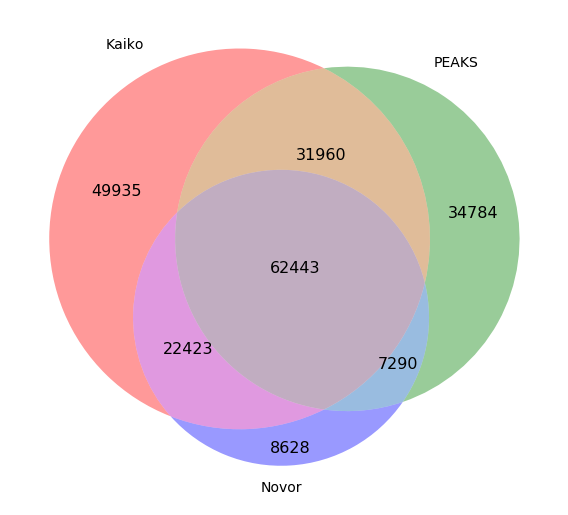

In [107]:
from matplotlib_venn import venn3

plt.figure(figsize=(8,8))

out = venn3([set(kaiko_correct_scans), set(peaks_correct_scans), set(novor_correct_scans)],
            ('Kaiko', 'PEAKS', 'Novor'))

# NUM_COLORS = 12
# cm = plt.get_cmap('Paired')
# colors = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]
# out.get_patch_by_id('100').set_color(colors[0])
# out.get_patch_by_id('010').set_color(colors[1])
# out.get_patch_by_id('001').set_color(colors[2])
# out.get_patch_by_id('110').set_color('magenta')
# out.get_patch_by_id('110').set_edgecolor('none')
# out.get_patch_by_id('110').set_alpha(0.4)

for text in out.set_labels:
    text.set_fontsize(14)
for text in out.subset_labels:
    text.set_fontsize(16)
plt.tight_layout()
plt.savefig("suppl_fig4.venn_dia.png", dpi=600)
plt.show()